In [1]:
from setup import *

cuda:0


In [2]:
vgg_model = models.vgg11_bn(pretrained=True)
print(vgg_model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

In [3]:
num_classes = len(classes)
n_epochs = 20
model = cnn_model(vgg_model, num_classes, convert_from_dense=False)
print(model)

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU(inplace=True)
      (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU(inplace=True)
      (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [4]:
unfreeze_all(model.parameters())
for name, param in model.named_parameters(): print(name, param.requires_grad)

0.0.0.weight True
0.0.0.bias True
0.0.1.weight True
0.0.1.bias True
0.0.4.weight True
0.0.4.bias True
0.0.5.weight True
0.0.5.bias True
0.0.8.weight True
0.0.8.bias True
0.0.9.weight True
0.0.9.bias True
0.0.11.weight True
0.0.11.bias True
0.0.12.weight True
0.0.12.bias True
0.0.15.weight True
0.0.15.bias True
0.0.16.weight True
0.0.16.bias True
0.0.18.weight True
0.0.18.bias True
0.0.19.weight True
0.0.19.bias True
0.0.22.weight True
0.0.22.bias True
0.0.23.weight True
0.0.23.bias True
0.0.25.weight True
0.0.25.bias True
0.0.26.weight True
0.0.26.bias True
1.0.weight True
1.0.bias True
1.1.weight True
1.1.bias True
1.4.weight True
1.4.bias True
1.5.weight True
1.5.bias True
1.8.weight True
1.8.bias True
1.9.weight True
1.9.bias True
1.12.weight True
1.12.bias True


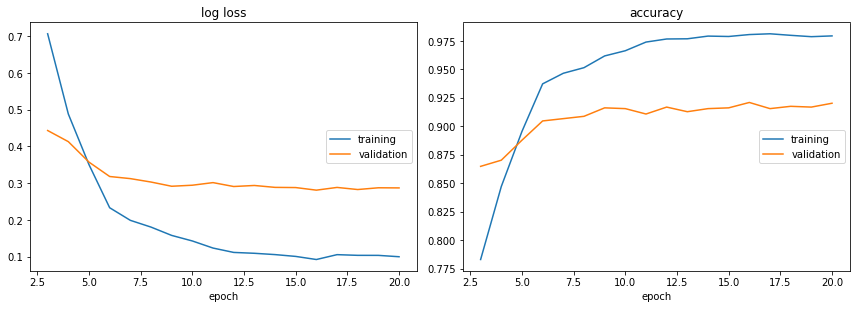

log loss:
training   (min:    0.092, max:    2.794, cur:    0.100)
validation (min:    0.281, max:    1.121, cur:    0.287)

accuracy:
training   (min:    0.249, max:    0.981, cur:    0.979)
validation (min:    0.717, max:    0.921, cur:    0.920)
Training complete in 17m 36s


In [5]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.2)
train_model(model, criterion, optimizer, exp_lr_scheduler, num_epochs=n_epochs)

In [6]:
vgg_model = models.vgg11_bn(pretrained=True)
model = cnn_model(vgg_model, num_classes, convert_from_dense=True)

In [7]:
unfreeze_all(model.parameters())
for name, param in model.named_parameters(): print(name, param.requires_grad)

0.0.0.weight True
0.0.0.bias True
0.0.1.weight True
0.0.1.bias True
0.0.4.weight True
0.0.4.bias True
0.0.5.weight True
0.0.5.bias True
0.0.8.weight True
0.0.8.bias True
0.0.9.weight True
0.0.9.bias True
0.0.11.weight True
0.0.11.bias True
0.0.12.weight True
0.0.12.bias True
0.0.15.weight True
0.0.15.bias True
0.0.16.weight True
0.0.16.bias True
0.0.18.weight True
0.0.18.bias True
0.0.19.weight True
0.0.19.bias True
0.0.22.weight True
0.0.22.bias True
0.0.23.weight True
0.0.23.bias True
0.0.25.weight True
0.0.25.bias True
0.0.26.weight True
0.0.26.bias True
1.0.weight True
1.0.bias True
1.1.weight True
1.1.bias True
1.4.weight True
1.4.bias True
1.5.weight True
1.5.bias True
1.8.weight True
1.8.bias True
1.9.weight True
1.9.bias True
1.12.weight True
1.12.bias True


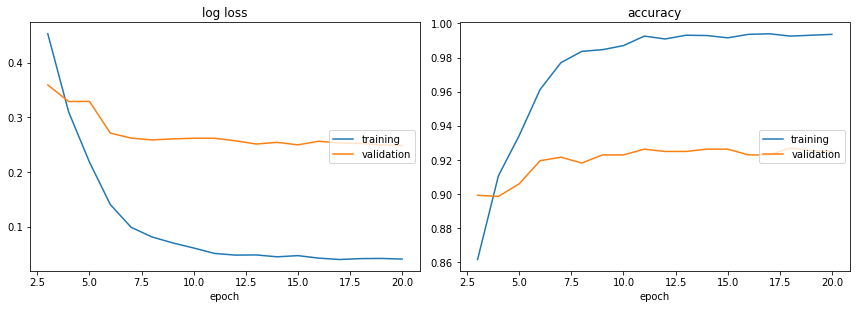

log loss:
training   (min:    0.040, max:    2.032, cur:    0.041)
validation (min:    0.248, max:    0.642, cur:    0.248)

accuracy:
training   (min:    0.436, max:    0.994, cur:    0.994)
validation (min:    0.822, max:    0.927, cur:    0.925)
Training complete in 17m 37s


In [8]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.2)
train_model(model, criterion, optimizer, exp_lr_scheduler, num_epochs=n_epochs)

In [9]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

20085029